<a href="https://colab.research.google.com/github/pksj/IIITA_2nd_SEM/blob/main/MIT2020024_ML_Assignment_01_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#4.(a) Implement two loss function (given in Figure 1) in logistic regression Generate and report 2 plots one for each cost function. In each plot, you need show two curves: one for the training set and one for the validation set. Run your code several times and observe if the results change. If they do, how would you choose the best parameter settings?


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# just to get mnist dataset
from sklearn.datasets import load_breast_cancer

**Data Preprocessing**

In [2]:
breast_cancer_data = load_breast_cancer()

features = breast_cancer_data.data
labels = breast_cancer_data.target


# Normalizatin

for i in range(30):                               # number of attributes = 30
    features[:,i] = (features[:,i] - min(features[:,i])) / (max(features[:,i]) - min(features[:,i]))
    

training_features = features[:400]
training_labels = labels[:400]

validation_features = features[400:]
validation_labels = labels[400:]





**Hypothesis Function**

In [3]:
def hypothesis(x_data, theta, bias):

    z = np.dot(x_data, theta) + bias
    # print("z",z)
    
    return 1.0  / ( 1.0 +  np.exp(-z))


##Loss Function 1

In [4]:
learning_rate = 0.1
iterations = 1000
bias = 0.0
theta_1 = np.zeros( len(training_features[0]))         # there are 30 features

In [5]:
def loss_function_1(x_data, y_data, theta_1, bias):

    cost = 0

    for x , y in zip(x_data, y_data):

        h = hypothesis(x,theta_1, bias)

        cost += (- y) * (np.log(h)) - (1 - y ) * (np.log(1- h))
    
    cost = cost / len(x_data)
    
    return cost

**Train function**

In [6]:
def train_1(iterations, learning_rate, x_data, y_data, theta_1,bias):

    cost_history = []
    m = len(x_data)
    # print("m =", m)

    for i in range(iterations):
        
        h = hypothesis(x_data, theta_1, bias)
        
        dj_by_dw = ( 1 / m ) * np.dot(x_data.T, h - y_data)
        dj_by_db = ( 1 / m ) * np.sum(h - y_data)
        
        theta_1 = theta_1 - dj_by_dw * learning_rate
        bias = bias - dj_by_db * learning_rate
        
        cost_history.append(loss_function_1(x_data, y_data, theta_1,bias))
        
    return theta_1, bias, cost_history

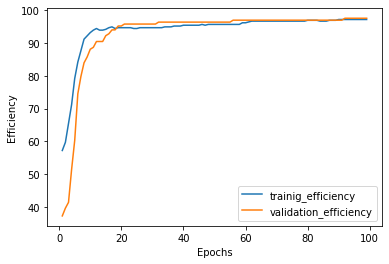

In [7]:
epochs = np.arange(1, 100)

training_efficiency = []
validation_efficiency = []

for epoch in epochs:

    cosy_history = []    

    theta_1, bias, cosy_history = train_1(epoch, learning_rate, training_features, training_labels, theta_1, bias)
    
    
    # print(theta_1)
    correct_prediction = 0

    for x, y in zip(training_features, training_labels):
            
        prediction = hypothesis(x, theta_1, bias)

        #print(prediction, y)
        if (( prediction >= 0.5 and y == 1 ) or ( prediction < 0.5 and y == 0 )):
            correct_prediction += 1

    training_efficiency.append(correct_prediction * 100 / len(training_features))

    plt.plot()


    correct_prediction = 0

    for x, y in zip(validation_features, validation_labels):
            
        prediction = hypothesis(x, theta_1, bias)

        #print(prediction, y)
        if (( prediction >= 0.5 and y == 1 ) or ( prediction < 0.5 and y == 0 )):
            correct_prediction += 1


    validation_efficiency.append(correct_prediction * 100 / len(validation_features))


plt.plot(epochs, training_efficiency)
plt.plot(epochs, validation_efficiency)
plt.xlabel("Epochs")
plt.ylabel("Efficiency")
plt.legend(['trainig_efficiency', 'validation_efficiency'])
plt.show()


##Loss Function 2

In [8]:
learning_rate = 0.1
iterations = 1000
bias = 0.0
theta_2 = np.zeros( len(training_features[0]))         # there are 30 features
lambda_value = 1

In [9]:
def loss_function_2(x_data, y_data, theta_2, bias, lambda_val):

    cost = 0

    for x , y in zip(x_data, y_data):

        h = hypothesis(x,theta_2, bias)

        cost += (- y) * (np.log(h)) - (1 - y ) * (np.log(1- h)) 
    
    cost += (lambda_value / 2) * sum([ t * t for t in theta_2 ])    # regularization part
    
    cost = cost / len(x_data)
    
    return cost

**Train function**

In [10]:
def train_2(iterations, learning_rate, x_data, y_data, theta_2,bias, lambda_value):

    cost_history = []
    m = len(x_data)
    # print("m =", m)

    for i in range(iterations):
        
        h = hypothesis(x_data, theta_2, bias)
        
        dj_by_dw = ( 1 / m ) * np.add( np.dot(x_data.T, h - y_data) , lambda_value * theta_2 )
        dj_by_db = ( 1 / m ) * np.sum(h - y_data)
        
        theta_2 = theta_2 - dj_by_dw * learning_rate
        bias = bias - dj_by_db * learning_rate
        
        cost_history.append(loss_function_2(x_data, y_data, theta_2,bias, lambda_value))
        
    return theta_2, bias, cost_history

**Predictions**

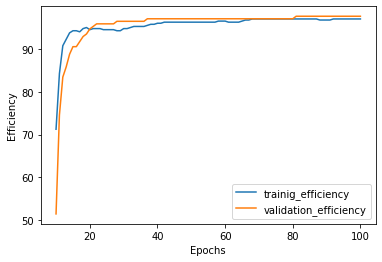

In [11]:
epochs = np.arange(10, 101, 1);

training_efficiency = []
validation_efficiency = []

for epoch in epochs:

    cosy_history = []

    theta_2, bias, cost_history = train_2(epoch, learning_rate, training_features, training_labels, theta_2, bias,lambda_value)
    # print(theta_1)
    correct_prediction = 0

    for x, y in zip(training_features, training_labels):
            
        prediction = hypothesis(x, theta_2, bias)

        #print(prediction, y)
        if (( prediction >= 0.5 and y == 1 ) or ( prediction < 0.5 and y == 0 )):
            correct_prediction += 1

    training_efficiency.append(correct_prediction * 100 / len(training_features))

    plt.plot()


    correct_prediction = 0

    for x, y in zip(validation_features, validation_labels):
            
        prediction = hypothesis(x, theta_2, bias)

        #print(prediction, y)
        if (( prediction >= 0.5 and y == 1 ) or ( prediction < 0.5 and y == 0 )):
            correct_prediction += 1


    validation_efficiency.append(correct_prediction * 100 / len(validation_features))


plt.plot(epochs, training_efficiency)
plt.plot(epochs, validation_efficiency)
plt.xlabel("Epochs")
plt.ylabel("Efficiency")
plt.legend(['trainig_efficiency', 'validation_efficiency'])
plt.show()


##(b) Generate graph with different value of lambda = 0; 0.001; 0.01; 0.1; 1.0 with respect to learning rate, number of epochs.

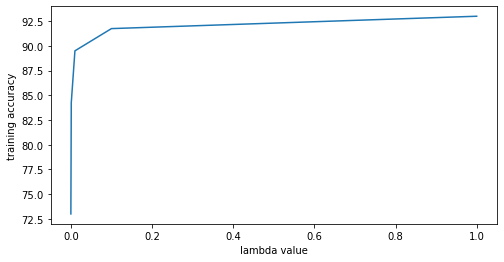

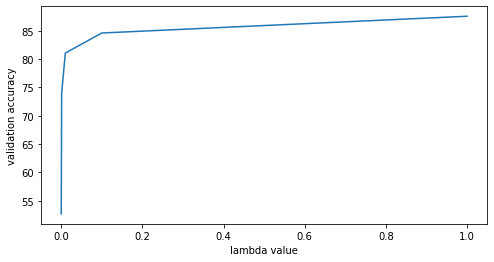

In [12]:
learning_rate = 0.001
iterations = 1000
bias = 0.0
theta_2 = np.zeros( len(training_features[0]))         # there are 30 features

lambda_values = [0,0.001,0.01,0.1,1]

training_accuracies = []
validation_accuracies = []

for lambda_value in lambda_values:

    cosy_history = []

    theta_2, bias, cost_history = train_2(iterations, learning_rate, training_features, training_labels, theta_2, bias, lambda_value)

    correct_prediction = 0

    for x, y in zip(training_features, training_labels):
            
        prediction = hypothesis(x, theta_2, bias)

        #print(prediction, y)
        if (( prediction >= 0.5 and y == 1 ) or ( prediction < 0.5 and y == 0 )):
            correct_prediction += 1


    training_accuracies.append(correct_prediction * 100 / len(training_features))


    correct_prediction = 0

    for x, y in zip(validation_features, validation_labels):
            
        prediction = hypothesis(x, theta_2, bias)

        #print(prediction, y)
        if (( prediction >= 0.5 and y == 1 ) or ( prediction < 0.5 and y == 0 )):
            correct_prediction += 1


    validation_accuracies.append(correct_prediction * 100 / len(validation_features))


plt.figure(figsize=(8,4))
plt.plot(lambda_values,training_accuracies)
plt.xlabel("lambda value")
plt.ylabel("training accuracy")
plt.show()
plt.figure(figsize=(8,4))
plt.plot(lambda_values,validation_accuracies)
plt.xlabel("lambda value")
plt.ylabel("validation accuracy")
plt.show()